## 비엔나 지하철 정거장

In [49]:
#라이브러리 추가
import numpy as np
import pandas as pd
import re
import networkx as nx
import matplotlib.pyplot as plt
import csv

In [50]:
# 파일 제목
total = []
f = open('C:/Users/HyunSeop/Desktop/BAFile/Viennasubway.csv', 'r')  # Vienna의 지하철 CSV가져왔습니다.
lines = f.readlines()
f.close()

del lines[0] # 맨처음 행,열 From to를 지워주었습니다.

In [51]:
data = []
for line in lines:
    data.append(line.split(';'))  # 각 요소들을 ; 을 기준으로 분류해줍니다.

In [52]:
data[0]
data[0][2:4]

for i in range(len(data)):
    del data[i][2:4]         # 뒤에 from to 를 제외한 정보를 없애줍니다.

In [53]:
import matplotlib as mpl  
import matplotlib.font_manager as fm
from matplotlib import rc
font_name=fm.FontProperties(fname="C:/Users/HyunSeop/HyunSeop/NanumBarunGothic.ttf").get_name()
rc('font', family=font_name)   # 폰트 설정

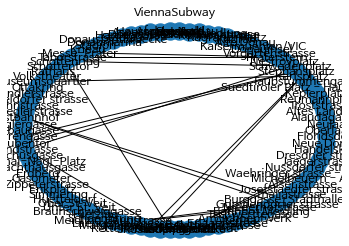

In [54]:
sb = nx.Graph(directed=True)          # 그래프 그리기


for i in range(len(data)):               # for문을 통한 edge 추가입니다.
    sb.add_edge(data[i][0],data[i][1])

plt.title('ViennaSubway')               

pos = nx.shell_layout(sb) 

nx.draw_shell(sb)
nx.draw_networkx_labels(sb, pos, font_family= font_name,fonz_size=0.2)

plt.show()     # 약 100개의 노선중에 서로 관련되어있는 노선들입니다.

In [55]:
nx.clustering(sb, data[0][1]) # 모든 요소들을 넣어도 중심도가 0으로 나온다.
# 그 이유가 궁금해서 알아본 결과 지하철의 경우 중심으로 잡을 수 있는 것이 없다.
# 그 이유는 계속 다 이어지는 것이 아닌 각자 몇개의 그룹씩만 이어지기 때문에 중심으로 잡을 수가 없다.

0

In [74]:
nx.average_clustering(sb) # 중심도가 0이기에 중심도의 평균도 0

0.0

In [58]:
nx.degree(sb,data[0][0]) # 특정 정거장의 degree

1

## 1호선만 봐보기

In [64]:
# 혹시 1호선만 보면 중심이 되는 정거장이 나올지 해서 1호선만 봐보기로 결정하였습니다.
totaladd = []
f = open('C:/Users/HyunSeop/Desktop/BAFile/Viennasubwayadd.csv', 'r')  # Vienna의 지하철 CSV가져왔습니다.
linesadd = f.readlines()
f.close()

del linesadd[0] # 맨처음 행,열 From to를 지워주었습니다.

In [65]:
dataadd = []
for lineadd in linesadd:
    dataadd.append(lineadd.split(';'))  # 각 요소들을 ; 을 기준으로 분류해줍니다.

In [70]:
for iadd in range(len(dataadd)):
    del dataadd[iadd][2:4]         # 뒤에 from to 를 제외한 정보를 없애줍니다.

In [71]:
import matplotlib as mpl  
import matplotlib.font_manager as fm
from matplotlib import rc
font_name=fm.FontProperties(fname="C:/Users/HyunSeop/HyunSeop/NanumBarunGothic.ttf").get_name()
rc('font', family=font_name)   # 폰트 설정

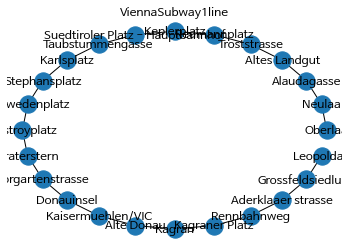

In [79]:
sbadd = nx.Graph(directed=True)          # 그래프 그리기

for iadd in range(len(dataadd)):               # for문을 통한 edge 추가입니다.
    sbadd.add_edge(dataadd[iadd][0],dataadd[iadd][1])

plt.title('ViennaSubway1line')               

pos = nx.shell_layout(sbadd) 

nx.draw_shell(sbadd)
nx.draw_networkx_labels(sbadd, pos, font_family= font_name,fonz_size=0.2)

plt.show()  
# 이 데이터의 경우 순환되는 노선을 보여줄뿐 결국 네트워크식으로 보여주는 데이터가 아니었습니다.


## 다시 전체 정거장 데이터의 정보

In [75]:
nx.degree_centrality(sb)  # 각 정거장 별로 얼마나 많은 노드가 연결되어있는지를 확인합니다.

{'Oberlaa': 0.010309278350515464,
 'Neulaa': 0.020618556701030927,
 'Alaudagasse': 0.020618556701030927,
 'Altes Landgut': 0.020618556701030927,
 'Troststrasse': 0.020618556701030927,
 'Reumannplatz': 0.020618556701030927,
 'Keplerplatz': 0.020618556701030927,
 'Suedtiroler Platz - Hauptbahnhof': 0.020618556701030927,
 'Taubstummengasse': 0.020618556701030927,
 'Karlsplatz': 0.05154639175257732,
 'Stephansplatz': 0.041237113402061855,
 'Schwedenplatz': 0.041237113402061855,
 'Nestroyplatz': 0.020618556701030927,
 'Praterstern': 0.041237113402061855,
 'Vorgartenstrasse': 0.020618556701030927,
 'Donauinsel': 0.020618556701030927,
 'Kaisermuehlen/VIC': 0.020618556701030927,
 'Alte Donau': 0.020618556701030927,
 'Kagran': 0.020618556701030927,
 'Kagraner Platz': 0.020618556701030927,
 'Rennbahnweg': 0.020618556701030927,
 'Aderklaaer strasse': 0.020618556701030927,
 'Grossfeldsiedlung': 0.020618556701030927,
 'Leopoldau': 0.010309278350515464,
 'Seestadt': 0.010309278350515464,
 'Aspern No

In [76]:
nx.eigenvector_centrality(sb) # 얼마나 네트워크에서 중요한 노드가 연결되어있나를 확인합니다.

{'Oberlaa': 5.7286203235469185e-05,
 'Neulaa': 0.0001711104786293122,
 'Alaudagasse': 0.0004538046640645343,
 'Altes Landgut': 0.0011843448122763306,
 'Troststrasse': 0.0030836435659234982,
 'Reumannplatz': 0.008025936672880504,
 'Keplerplatz': 0.020888241567302866,
 'Suedtiroler Platz - Hauptbahnhof': 0.054362883210382774,
 'Taubstummengasse': 0.1414819516923049,
 'Karlsplatz': 0.36821246585439393,
 'Stephansplatz': 0.397593407947549,
 'Schwedenplatz': 0.38082312882022623,
 'Nestroyplatz': 0.17228787340432064,
 'Praterstern': 0.1337617536243974,
 'Vorgartenstrasse': 0.051397302186533184,
 'Donauinsel': 0.019749293361538158,
 'Kaisermuehlen/VIC': 0.007588696793200314,
 'Alte Donau': 0.0029160116918859978,
 'Kagran': 0.0011205175185778908,
 'Kagraner Platz': 0.00043056829764164634,
 'Rennbahnweg': 0.00016540150465009648,
 'Aderklaaer strasse': 6.33945610058975e-05,
 'Grossfeldsiedlung': 2.3912245204046657e-05,
 'Leopoldau': 8.008610112811028e-06,
 'Seestadt': 1.1853953568869881e-06,
 'A

In [77]:
nx.closeness_centrality(sb)  # 중요한 노드가 얼마나 근접해있는지를 확인합니다.

{'Oberlaa': 0.06662087912087912,
 'Neulaa': 0.0713235294117647,
 'Alaudagasse': 0.07661927330173776,
 'Altes Landgut': 0.08262350936967632,
 'Troststrasse': 0.08948339483394833,
 'Reumannplatz': 0.09738955823293173,
 'Keplerplatz': 0.10659340659340659,
 'Suedtiroler Platz - Hauptbahnhof': 0.11743341404358354,
 'Taubstummengasse': 0.1303763440860215,
 'Karlsplatz': 0.1460843373493976,
 'Stephansplatz': 0.14854517611026033,
 'Schwedenplatz': 0.14946070878274267,
 'Nestroyplatz': 0.13896848137535817,
 'Praterstern': 0.1326949384404925,
 'Vorgartenstrasse': 0.11990111248454882,
 'Donauinsel': 0.10911136107986502,
 'Kaisermuehlen/VIC': 0.09989701338825953,
 'Alte Donau': 0.09194312796208531,
 'Kagran': 0.08501314636283962,
 'Kagraner Platz': 0.07892595606183889,
 'Rennbahnweg': 0.07354056103108415,
 'Aderklaaer strasse': 0.06874557051736357,
 'Grossfeldsiedlung': 0.06445182724252492,
 'Leopoldau': 0.060587133041848845,
 'Seestadt': 0.05539691604797259,
 'Aspern Nord': 0.05861027190332326,
 

In [78]:
nx.betweenness_centrality(sb) # 최단 경로를 파악하여 중심성을 파악합니다.

{'Oberlaa': 0.0,
 'Neulaa': 0.020618556701030927,
 'Alaudagasse': 0.040807560137457045,
 'Altes Landgut': 0.06056701030927835,
 'Troststrasse': 0.07989690721649484,
 'Reumannplatz': 0.09879725085910653,
 'Keplerplatz': 0.1172680412371134,
 'Suedtiroler Platz - Hauptbahnhof': 0.13530927835051546,
 'Taubstummengasse': 0.1529209621993127,
 'Karlsplatz': 0.38840564146620826,
 'Stephansplatz': 0.30777491408934704,
 'Schwedenplatz': 0.3807989690721649,
 'Nestroyplatz': 0.24781643757159227,
 'Praterstern': 0.3803694158075601,
 'Vorgartenstrasse': 0.17010309278350516,
 'Donauinsel': 0.1529209621993127,
 'Kaisermuehlen/VIC': 0.13530927835051546,
 'Alte Donau': 0.1172680412371134,
 'Kagran': 0.09879725085910653,
 'Kagraner Platz': 0.07989690721649484,
 'Rennbahnweg': 0.06056701030927835,
 'Aderklaaer strasse': 0.040807560137457045,
 'Grossfeldsiedlung': 0.020618556701030927,
 'Leopoldau': 0.0,
 'Seestadt': 0.0,
 'Aspern Nord': 0.020618556701030927,
 'Hausfeldstrasse': 0.040807560137457045,
 'Asp